# Дипломная работа по курсу «Python для анализа данных»

In [20]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly
from scipy.stats import ttest_ind


init_notebook_mode(connected=True)

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

### 1. Загрузить файл hr.csv (можно найти во сложении к заданию)

In [3]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
hr1 = hr.agg(['mean', 'median', 'min', 'max', 'std'])
#одной строкой hr.agg(['mean', 'median', 'min', 'max', 'std', 'mode']) не отработало, так как mode имеет специфичный вывод,
#поэтому считаем отдельно и клеим
hr1.loc['mode'] = hr.mode().iloc[0]
hr1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,IT,high
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,technical,medium
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [35]:
# Уберем все пустые значения
hr.dropna()

# Заменим все нечисловые значения числами
hr.loc[hr["sales"] == "IT","sales"] = 0
hr.loc[hr["sales"] == "RandD","sales"] = 1
hr.loc[hr["sales"] == "accounting","sales"] = 2
hr.loc[hr["sales"] == "hr","sales"] = 3
hr.loc[hr["sales"] == "management","sales"] = 4
hr.loc[hr["sales"] == "marketing","sales"] = 5
hr.loc[hr["sales"] == "product_mng","sales"] = 6
hr.loc[hr["sales"] == "sales","sales"] = 7
hr.loc[hr["sales"] == "support","sales"] = 8
hr.loc[hr["sales"] == "technical","sales"] = 9

hr.loc[hr["salary"] == "low","salary"] = 0
hr.loc[hr["salary"] == "medium","salary"] = 1
hr.loc[hr["salary"] == "high","salary"] = 2

hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,0.098119
sales,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,-0.043081
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.043081,1.000000


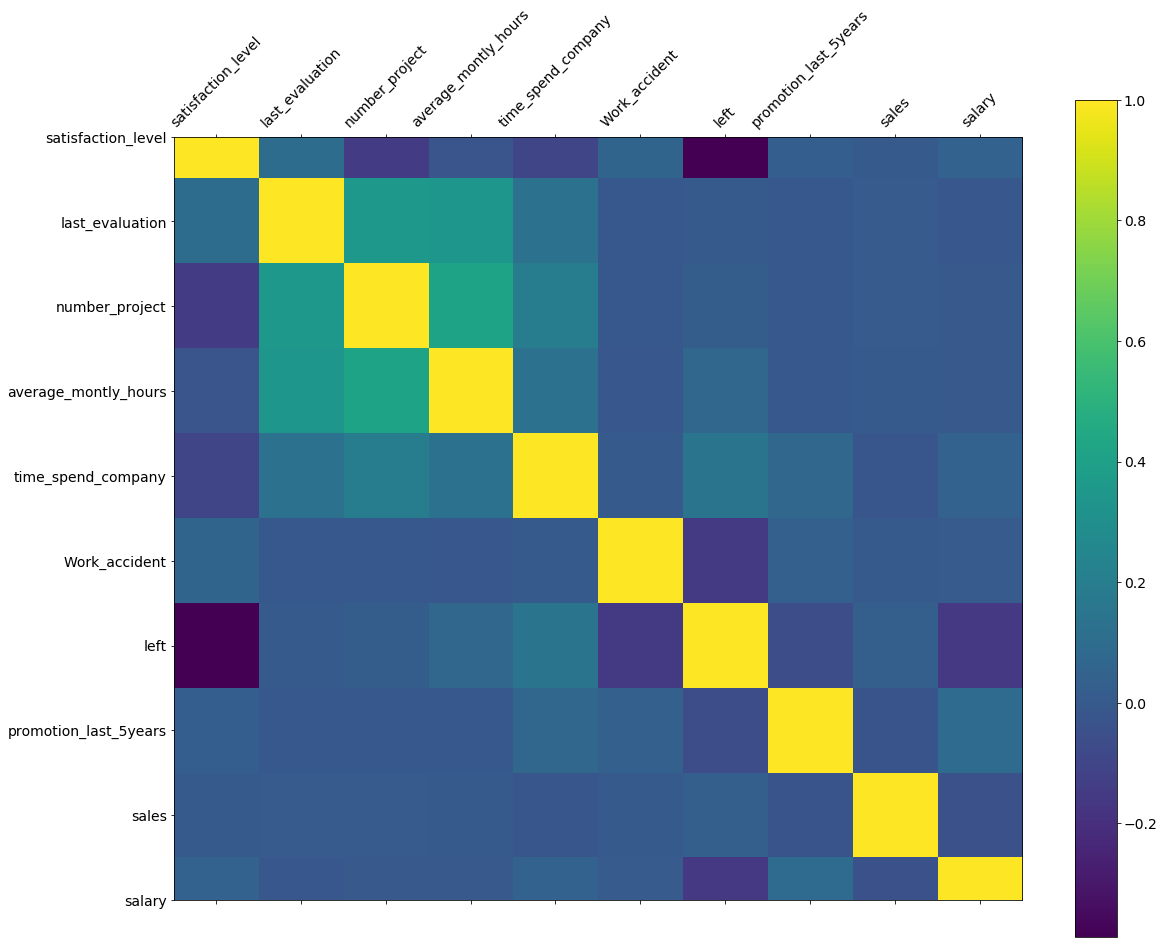

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(hr.corr(), fignum=f.number)
plt.xticks(range(hr.shape[1]), hr.columns, fontsize=14, rotation=45)
plt.yticks(range(hr.shape[1]), hr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

### 4. Визуализировать несколько взаимосвязей между переменными

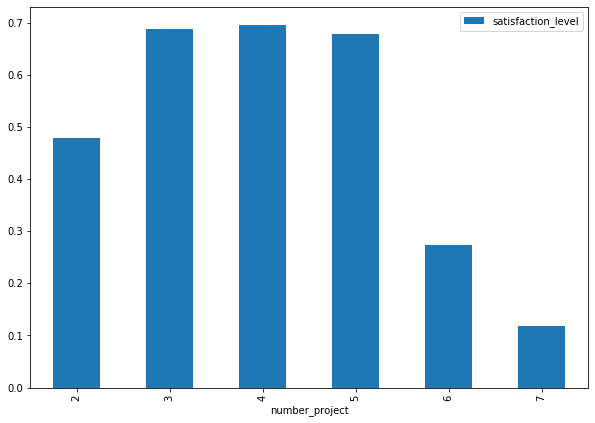

In [28]:
# Проверим, насколько загрузка по проектам влияет на удовлетворённость работников
projectsat = hr.groupby('number_project').mean()[['satisfaction_level']]
projectsat.plot(kind='bar')
#Видно, что оптимальная нагрузка на сотрудника - 3-5 проектов, 
#при большем или меньшем значении сотрудники теряют уровень удовлетворенности

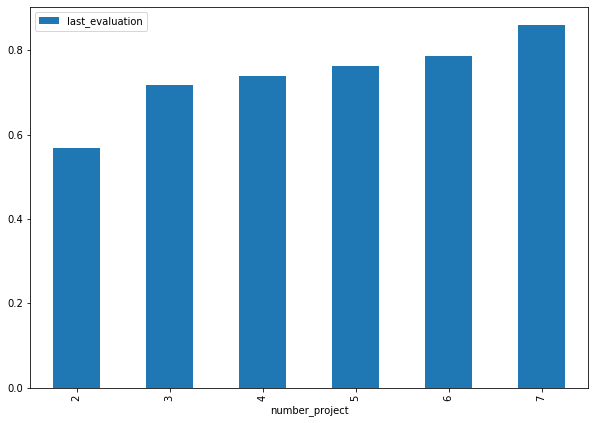

In [29]:
# Проверим, теорию, что больше всех загружают самых лучших сотрудников
projectsat = hr.groupby('number_project').mean()[['last_evaluation']]
projectsat.plot(kind='bar')
# Гипотеза потдверилась

In [44]:
# Построим зависимость между специальностью, оценкой, и удовлетворенностью сотрудников
deptscores = hr.groupby('salary').mean()[['last_evaluation', 'satisfaction_level']]

In [49]:
trace0 = go.Scatter(
    x=deptscores.index,
    y=deptscores.last_evaluation,
    mode = 'markers+text',
    text = round(deptscores.satisfaction_level, 2),
    textposition='bottom center',
    marker = dict(
        size = deptscores.satisfaction_level*100,
    )
)

top = [trace0]
layout = {'title': 'Evaluation and satisfaction by salary', 'yaxis': {'title': 'Evaluation'}, 
          'xaxis': {'title': 'Salary'}}

fig = go.Figure(data=top, layout=layout)

iplot(fig, show_link=False)

# Видно, что зарплата практически никак не влияет на уровень удовлетворенности сотрудников, 
# при этом люди со слишком высокой зарплатой работают хуже (получают более низкие оценки)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [37]:
# Проверим гипотезу о том, загрузка не влияет на время, проводимое на работе

lowload = hr[hr['number_project'] <= 5]
highload = hr[hr['number_project'] > 5]

ttest_ind(lowload['average_montly_hours'], highload['average_montly_hours'])
# Так как pvalue=9.35271628256402e-285, то есть крайне низкий, гипотезу можно считаь опровергнутой, 
# загрузка явно влияет на рабочее время

Ttest_indResult(statistic=-36.85740680935796, pvalue=9.35271628256402e-285)

In [39]:
# Проверим гипотезу о том, что оценка не влияет на решение человека уволиться

leftstaff = hr[hr['left'] == 1]
workstaff = hr[hr['left'] == 0]

ttest_ind(leftstaff['last_evaluation'], workstaff['last_evaluation'])
# Так как pvalue=0.4212701963735056, значительно выше 0,05, то выборки можно считать похожими, а гипотезу, соответственно, 
# подтверждённой

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

### 6. Рассчитать сколько работников работает в каждом департаменте

In [63]:
countdepts = hr.groupby('sales').count().reset_index()[['sales', 'satisfaction_level']]
countdepts.rename(columns={'sales': 'Department', 'satisfaction_level': 'Staffers'}, inplace=True)
countdepts

,Department,Staffers
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


### 7. Показать распределение сотрудников по зарплатам

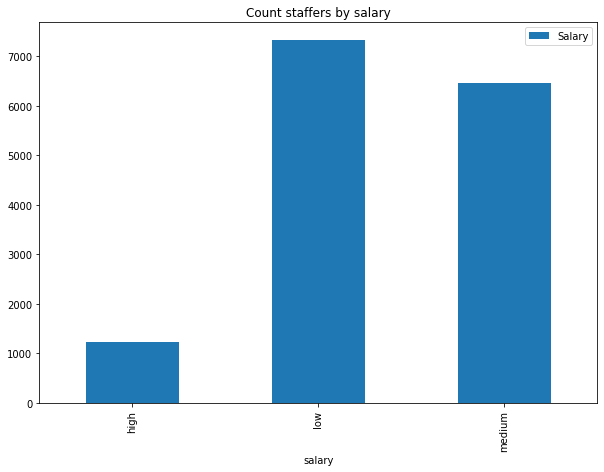

In [89]:
staffsalary = hr.groupby(['salary']).count()[['satisfaction_level']]
staffsalary.rename(columns={'sales': 'Department', 'satisfaction_level': 'Salary'}, inplace=True)
staffsalary.unstack()
staffsalary.plot(kind='bar', title='Count staffers by salary')

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

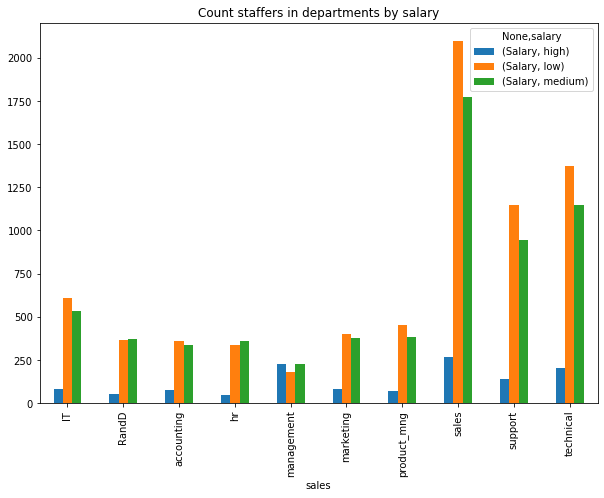

In [83]:
staffsalary = hr.groupby(['sales', 'salary']).count()[['satisfaction_level']]
staffsalary.rename(columns={'sales': 'Department', 'satisfaction_level': 'Salary'}, inplace=True)
staffsalary.unstack().plot(kind='bar', title='Count staffers in departments by salary')

### 9. Сколько сотрудников покинули компанию

In [97]:
leftstaff = hr[hr['left'] == 1]
len(leftstaff.index)

3571

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [140]:
'''
Можно проверить сразу несколько теорий одним коротким запросом. Сразу видно, что:

1) Покинувшие компанию сотрудники были менее удовлетворены работой
2) Вероятность покидания компании практически не зависит от оценки сотрудника и нагрузки на него
3) Уволившиеся работали больше и при этом получали, как ни странно, меньше взысканий (Work_accident)
4) Очень хорошо видно зависимость увольнений от продвижения по карьерной лестнице (promotion_last_5years)
'''

hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [127]:
# + зависимость увольнения от зарплаты

salaryleft = hr.pivot_table(index = 'left', columns = 'salary', values = 'number_project', aggfunc = 'count', fill_value = 0).head()
salaryleft

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317
Total,1237,7316,6446


In [139]:
columns = list(salaryleft)
for i in columns:
    print (i, round(salaryleft[i][1]/(salaryleft[i][0]+salaryleft[i][1])*100, 2))

# видно, что люди с низкой зарплатой увольняются значительно чаще

high 6.63
low 29.69
medium 20.43
